# Fashion MNIST

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [3]:
from keras.datasets import fashion_mnist
import tensorflow as tf

Using TensorFlow backend.


### Loading Dataset

In [4]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [5]:
print('Shape of training input =',trainX.shape)
print('Shape of training output =',trainy.shape)
print('Shape of testing input =',testX.shape)
print('Shape of testing output =',testy.shape)

Shape of training input = (60000, 28, 28)
Shape of training output = (60000,)
Shape of testing input = (10000, 28, 28)
Shape of testing output = (10000,)


In [52]:
labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
labels

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### Visualising some samples

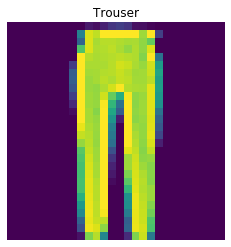

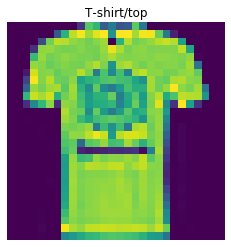

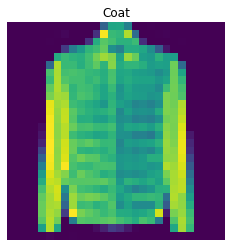

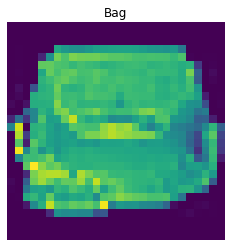

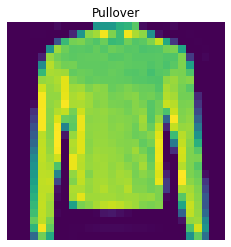

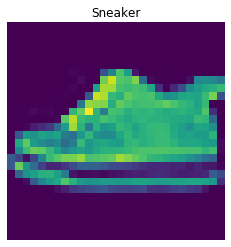

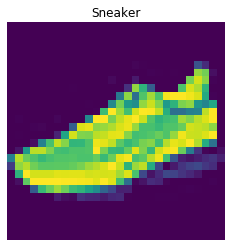

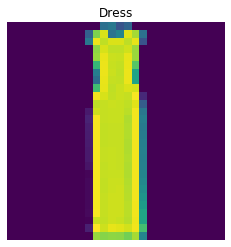

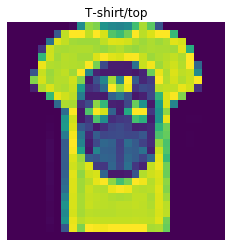

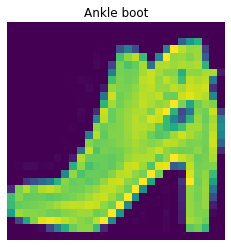

<Figure size 432x288 with 0 Axes>

In [67]:
index = np.random.randint(0,60000,10)
trainy_sample = list(pd.Series(trainy).map(labels))

for i in index:
    plt.imshow(trainX[i])
    plt.title(trainy_sample[i])
    plt.axis('off')
    plt.figure()

### Normalizing and reshaping the data

In [72]:
training_images = trainX.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = testX.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

### 1st Basic Model

In [124]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [125]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               2769152   
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2570      
Total params: 2,772,362
Trainable params: 2,772,362
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [127]:
model.fit(training_images, trainy, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.3644 - accuracy: 0.8686
Epoch 2/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.2414 - accuracy: 0.9114
Epoch 3/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1940 - accuracy: 0.9286
Epoch 4/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1556 - accuracy: 0.9416
Epoch 5/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1273 - accuracy: 0.9526
Epoch 6/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1009 - accuracy: 0.9635
Epoch 7/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.0819 - accuracy: 0.9701
Epoch 8/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0635 - accuracy: 0.9768
Epoch 9/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0530 - accuracy: 0.9808
Epoch 10/10
60

###  Adding Few more Convolutional Layers

In [130]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [131]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               1638912   
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

In [132]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [133]:
model.fit(training_images, trainy, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.4013 - accuracy: 0.8533
Epoch 2/10
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.2658 - accuracy: 0.9020
Epoch 3/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.2194 - accuracy: 0.9183
Epoch 4/10
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.1844 - accuracy: 0.9309
Epoch 5/10
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.1510 - accuracy: 0.9435s - loss: 0.1507 - 
Epoch 6/10
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.1261 - accuracy: 0.9531
Epoch 7/10
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.1027 - accuracy: 0.9605
Epoch 8/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0838 - accuracy: 0.9679
Epoch 9/10
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.0686 - accuracy: 0.

### Trying with loss function as RMSprop

In [140]:
from tensorflow.keras.optimizers import RMSprop

In [142]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  #tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, trainy, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 456us/sample - loss: 0.4552 - accuracy: 0.8338
Epoch 2/10
60000/60000 [==============================] - 28s 469us/sample - loss: 0.3030 - accuracy: 0.8903
Epoch 3/10
60000/60000 [==============================] - 28s 463us/sample - loss: 0.2642 - accuracy: 0.9042
Epoch 4/10
60000/60000 [==============================] - 27s 458us/sample - loss: 0.2393 - accuracy: 0.9125
Epoch 5/10
60000/60000 [==============================] - 27s 452us/sample - loss: 0.2230 - accuracy: 0.9187
Epoch 6/10
60000/60000 [==============================] - 27s 454us/sample - loss: 0.2113 - accuracy: 0.9237- loss: 0.2108 - accura
Epoch 7/10
60000/60000 [==============================] - 27s 454us/sample - loss: 0.2021 - accuracy: 0.9258
Epoch 8/10
60000/60000 [==============================] - 27s 454us/sample - loss: 0.1945 - accuracy: 0.9303
Epoch 9/10
60000/60000 [==============================] - 27s 457us/sample - loss:

### Creating a CallBack

   * We will create a callback for achieving 99.5% accuracy on the training data

In [55]:
class FinalCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.995):
            print('\nReached above accuracy of 0.995 so training is stopped')
            self.model.stop_training=True
callbacks = FinalCallback()

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [53]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images, trainy, epochs = 25, callbacks = [callbacks])

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 43s 719us/sample - loss: 0.3942 - accuracy: 0.8593
Epoch 2/25
60000/60000 [==============================] - 41s 682us/sample - loss: 0.2675 - accuracy: 0.9031
Epoch 3/25
60000/60000 [==============================] - 41s 690us/sample - loss: 0.2215 - accuracy: 0.9189
Epoch 4/25
60000/60000 [==============================] - 40s 672us/sample - loss: 0.1885 - accuracy: 0.9306
Epoch 5/25
60000/60000 [==============================] - 44s 728us/sample - loss: 0.1612 - accuracy: 0.9404
Epoch 6/25
60000/60000 [==============================] - 42s 707us/sample - loss: 0.1375 - accuracy: 0.9493
Epoch 7/25
60000/60000 [==============================] - 46s 760us/sample - loss: 0.1168 - accuracy: 0.9570
Epoch 8/25
60000/60000 [==============================] - 46s 765us/sample - loss: 0.0989 - accuracy: 0.9633
Epoch 9/25
60000/60000 [==============================] - 45s 754us/sample - loss: 0.0844 - accuracy: 0.9

   Accuracy of **99.39%**

In [56]:
test_loss, test_acc = model.evaluate(test_images, testy)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [57]:
test_acc

0.9127

Text(0, 0.5, 'Loss')

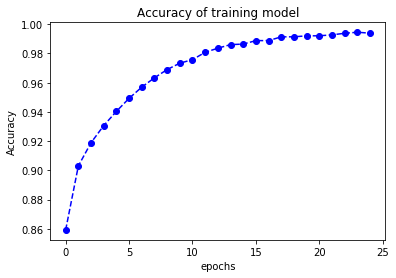

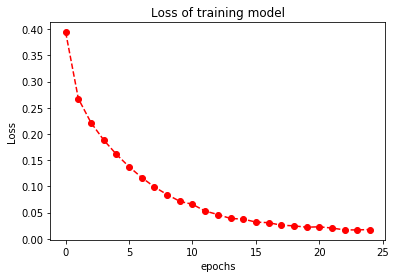

In [67]:
plt.plot(model.history.epoch,model.history.history['accuracy'],c='b',marker = 'o',ls='--')
plt.title('Accuracy of training model')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.figure()
plt.plot(model.history.epoch,model.history.history['loss'],c='r',marker = 'o',ls='--')
plt.title('Loss of training model')
plt.xlabel('epochs')
plt.ylabel('Loss')

## Final Model

 We will split our data to get a **validation set..**

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_val, y_train, y_val = train_test_split(trainX,trainy, test_size=0.2, random_state=0)

In [62]:
print(_train.shape

(48000,)

In [63]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train/255.0
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_val = X_val/255.0

In [64]:
class FinalCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.995):
            print('\nReached above accuracy of 0.995 so training is stopped')
            self.model.stop_training=True
callbacks = FinalCallback()

In [68]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [69]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_31 (Dense)             (None, 10)              

In [70]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 35, callbacks = [callbacks],validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/35
48000/48000 [==============================] - 37s 761us/sample - loss: 0.4774 - accuracy: 0.8259 - val_loss: 0.3618 - val_accuracy: 0.8712
Epoch 2/35
48000/48000 [==============================] - 35s 724us/sample - loss: 0.3182 - accuracy: 0.8846 - val_loss: 0.3105 - val_accuracy: 0.8867
Epoch 3/35
48000/48000 [==============================] - 35s 722us/sample - loss: 0.2695 - accuracy: 0.9009 - val_loss: 0.2857 - val_accuracy: 0.8979
Epoch 4/35
48000/48000 [==============================] - 34s 716us/sample - loss: 0.2346 - accuracy: 0.9132 - val_loss: 0.2607 - val_accuracy: 0.9045
Epoch 5/35
48000/48000 [==============================] - 34s 717us/sample - loss: 0.2109 - accuracy: 0.9214 - val_loss: 0.2553 - val_accuracy: 0.9096
Epoch 6/35
48000/48000 [==============================] - 34s 703us/sample - loss: 0.1849 - accuracy: 0.9310 - val_loss: 0.2844 - val_accuracy: 0.9003
Epoch 7/35
48000/48000 [====================

 We got Training accuracy = **99.36%** and Validation accuracy = **90.94%**

In [73]:
test_loss, test_acc = model.evaluate(test_images, testy)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [132]:
print('The Accurracy in the test set is = ' + str(test_acc))

The Accurracy in the test set is = 0.9057


### Visualizing your results

In [79]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']   
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = model.history.epoch

Text(0, 0.5, 'Accuracy')

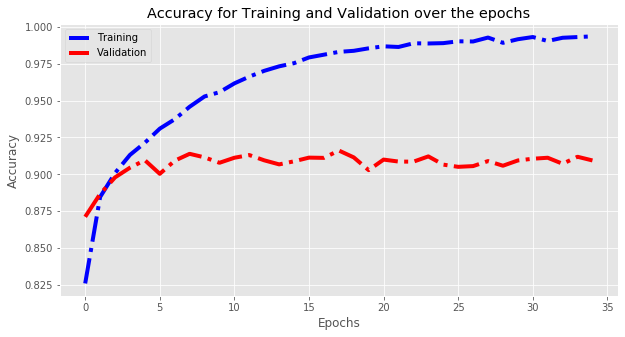

In [130]:
plt.figure(figsize=(10,5),frameon=False)
plt.plot(epochs,acc,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_acc,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Accuracy for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

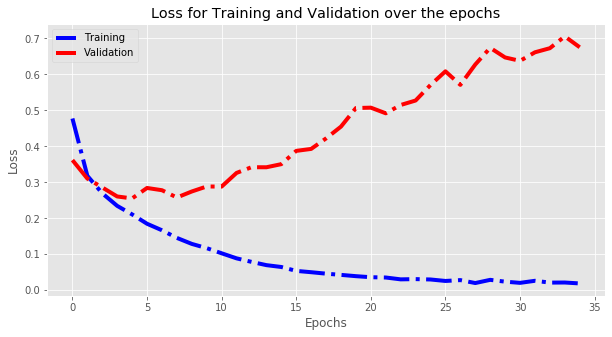

In [131]:
plt.figure(figsize=(10,5))
plt.plot(epochs,loss,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_loss,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Loss for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.gca().spines["right"].set_visible(False)